# West Nile Virus analysis: spatial factors and prediction  
## Mid-term draft 
Hanpu Yao  
Professor Jonanthan Tannen



### Proposals: 

**Goal**: find the high risk area of West Nile Virus and allocate pesticide accordingly.  
-	Predict the time and place that WNV may propably present  

**Dataset**:
1.	Main data: mosquitos captured in traps (2007/5 – 2021/9):  
Time,
Location, 
Mosquitoes(number, spiecies, WNV positivity)


2.	Spray Data: spraying pesticide to kill mosquitos (2011/8 – 2013/9 will reach out for more data) 
Time
Location (area)

3.	Weather Data – WNV prefers hot and dry environment: 
Rain, 
Wind, 
Temperature, 
Moisture
		
4.	Bird - Report positive case of dead bird

5.	Urban environment – 311 sanitation report

6.	Natural environment location: Parks, water


**Mid term status:**

wrangling data to visualize and see what is the probable relationship.

**Problem**

1. Spray data only contain one year and City of Chicago didn't reply yet. For now I maybe have to narrow down the time span to that one year. And if they give the whole data then I can add them in and run the same process.
2. There are temperal and spatial factors, so I have to find a proper way to handle this two dimension best.
+ Temperal factors: 
1. Pesticide effect over time
2. Positive cases in past days may affect cases in future days (if no pesticide sprayed)

+ Spatial factors:
1. Distantce to park, lakes, river or dirty place.
2. Wind effect: positive cases in upwind area may affect downwind area.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px #
import matplotlib.pyplot as plt
import geoplot as gplt
import geopandas as gpd
# change address text to coordinates
import contextily as ctx

import geopandas as gpd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") # don't show warnings

In [2]:
df_trap_raw = pd.read_csv('../data/Processed data/trap.csv')

In [3]:
data_vis_1 = pd.DataFrame(df_trap_raw.groupby(['season_year','trap'])['result_b'].sum()).reset_index()
data_vis_1

,season_year,trap,result_b
0,2007,T001,0
1,2007,T002,8
2,2007,T003,4
3,2007,T004,0
4,2007,T005,2
...,...,...,...
1330,2021,T909,19
1331,2021,T910,6
1332,2021,T912,1
1333,2021,T913,8


In [4]:
df_trap = df_trap_raw

In [10]:
df_trap.groupby('season_year').sum('number_of_mosquitoes')

,Unnamed: 0,week,test_id,number_of_mosquitoes,latitude,longitude,month,result_b
season_year,,,,,,,,
2007,115851492,118033,82278846,57708,156167.803460,-327518.838837,30010,234
2008,58883976,65808,52644954,24034,87708.848889,-183830.039199,16243,99
2009,58296329,65716,61394792,21108,94120.040357,-197273.505371,16452,19
2010,56385178,74484,70784947,21885,99988.478415,-209548.299629,18423,76
2011,43915547,63435,65431133,18799,85970.547532,-180176.738570,15570,57
2012,47365731,76344,84619653,36021,103742.583940,-217368.884713,18603,437
2013,39897364,74481,87759113,36444,100109.501886,-209801.025884,18114,239
2014,38543505,87152,107196726,37658,114256.912716,-239440.123436,20987,211
2015,20798378,53316,72700694,16997,73301.641839,-153606.476295,13189,113


<AxesSubplot:ylabel='number_of_mosquitoes'>

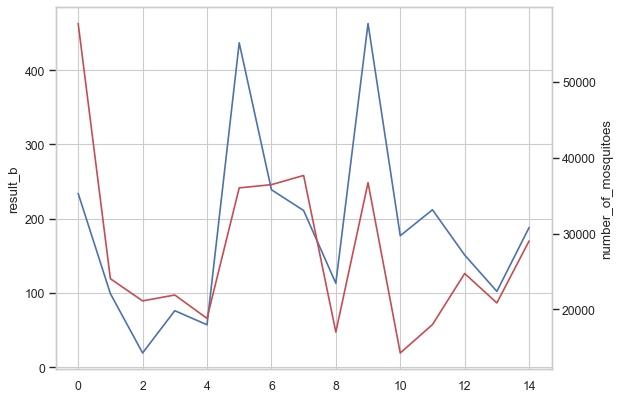

In [11]:
p1 = df_trap.groupby('season_year').sum()[['result_b','number_of_mosquitoes']].reset_index()
fig = plt.figure(figsize=(8, 6), dpi=80)
sns.set_theme(style="whitegrid")

sns.lineplot(data=p1.result_b)
ax2 = plt.twinx()
ax2.grid(None)
sns.lineplot(data=p1.number_of_mosquitoes, color="r", ax=ax2)

In [12]:
df_trap

,Unnamed: 0,season_year,week,test_id,block,trap,trap_type,test_date,number_of_mosquitoes,result,species,latitude,longitude,location,geometry,month,result_b,year_week
0,0,2021,39,53373,12XX W GREENLEAF AVE,T018,GRAVID,2021-09-30 00:09:00,2,negative,CULEX PIPIENS/RESTUANS,42.010529,-87.660845,"{'latitude': '42.01052928915475', 'longitude':...",POINT (-87.660845069 42.010529289),9,0,2021/W39
1,1,2021,39,53381,61XX W FULLERTON AVE,T013,GRAVID,2021-09-30 00:09:00,13,negative,CULEX PIPIENS/RESTUANS,41.923887,-87.778910,"{'latitude': '41.92388736426867', 'longitude':...",POINT (-87.778909912 41.923887364),9,0,2021/W39
2,2,2021,39,53406,10XX E 67TH ST,T073,GRAVID,2021-09-30 00:09:00,7,negative,CULEX PIPIENS/RESTUANS,41.773085,-87.600168,"{'latitude': '41.773085401492715', 'longitude'...",POINT (-87.600167559 41.773085401),9,0,2021/W39
3,3,2021,39,53401,52XX W 63RD ST,T065,GRAVID,2021-09-30 00:09:00,8,negative,CULEX PIPIENS/RESTUANS,41.778305,-87.754366,"{'latitude': '41.77830515554422', 'longitude':...",POINT (-87.754366286 41.778305156),9,0,2021/W39
4,4,2021,39,53383,5XX S CENTRAL AVE,T031,GRAVID,2021-09-30 00:09:00,5,positive,CULEX PIPIENS/RESTUANS,41.872873,-87.764737,"{'latitude': '41.87287286249572', 'longitude':...",POINT (-87.764736532 41.872872862),9,1,2021/W39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32873,32873,2007,21,20012,75XX N OAKLEY AVE,T148,GRAVID,2007-05-29 00:05:00,1,negative,CULEX PIPIENS/RESTUANS,42.017801,-87.687601,"{'latitude': '42.0178008501155', 'longitude': ...",POINT (-87.687601446 42.01780085),5,0,2007/W21
32874,32874,2007,21,20038,22XX W 113TH ST,T086,GRAVID,2007-05-29 00:05:00,1,negative,CULEX PIPIENS/RESTUANS,41.688171,-87.678252,"{'latitude': '41.688170589570205', 'longitude'...",POINT (-87.678251676 41.68817059),5,0,2007/W21
32875,32875,2007,21,20051,2XX W 89TH ST,T096,CDC,2007-05-29 00:05:00,5,negative,CULEX RESTUANS,41.732428,-87.631056,"{'latitude': '41.73242806400838', 'longitude':...",POINT (-87.63105648 41.732428064),5,0,2007/W21
32876,32876,2007,21,20031,22XX N CANNON DR,T054,GRAVID,2007-05-29 00:05:00,2,negative,CULEX PIPIENS/RESTUANS,41.922512,-87.632378,"{'latitude': '41.922512376871495', 'longitude'...",POINT (-87.63237767 41.922512377),5,0,2007/W21


In [13]:
df_trap.groupby(['season_year','month']).sum()

Unnamed: 0   week   test_id  number_of_mosquitoes  \
season_year month                                                      
2007        5          821625    525    500647                    40   
            6         5733875   4036   3533232                   427   
            7        18624250  15697  11970961                  7199   
            8        63708875  64131  44888479                 40015   
            9        20791750  25415  16342107                  8321   
...                       ...    ...       ...                   ...   
2020        10          66994   1640   2123144                   139   
2021        6          407238   6560  14338890                  3533   
            7          578838  15334  28432566                 11244   
            8          255584  14463  23680160                  9680   
            9           60031  12810  18479485                  4555   

                       latitude      longitude  result_b  
season_year month                                         
2007        5       1046.746283   -2192.340735         0  
            6       7328.464677  -15349.658285         0  
            7      24048.606467  -50415.096188         6  
            8      85652.842740 -179691.024418       200  
            9      29266.162985  -61369.424263        26  
...                         ...            ...       ...  
2020        10      1715.911355   -3595.933641         0  
2021        6      11553.873256  -24210.577727         0  
            7      22742.596260  -47642.749527        28  
            8      18761.140047  -39299.674081       131  
            9      14523.421103  -30432.341917        29  

[67 rows x 7 columns]

Text(0.5, 1.0, 'Number of positive cases over month')

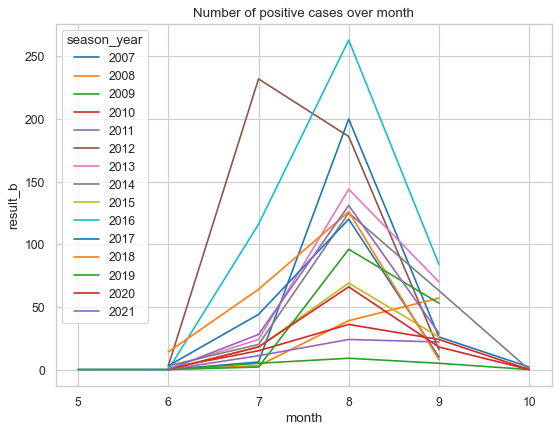

In [14]:
p2 = df_trap.groupby(['season_year','month']).sum()[['result_b','number_of_mosquitoes']].reset_index()
fig = plt.figure(figsize=(8, 6), dpi=80)

sns.lineplot(data=p2, x= 'month', y ='result_b',hue='season_year', palette='tab10')
plt.title('Number of positive cases over month')


Text(0.5, 1.0, 'Number of mosquitoes over month')

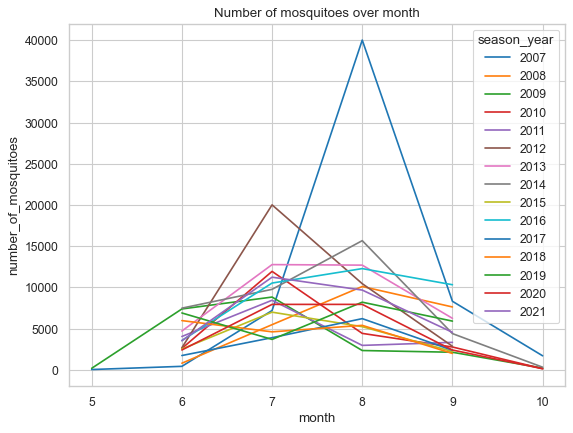

In [15]:
fig = plt.figure(figsize=(8, 6), dpi=80)

sns.lineplot(data=p2, x= 'month', y ='number_of_mosquitoes',hue='season_year', palette='tab10')
plt.title('Number of mosquitoes over month')


<AxesSubplot:xlabel='month', ylabel='number_of_mosquitoes'>

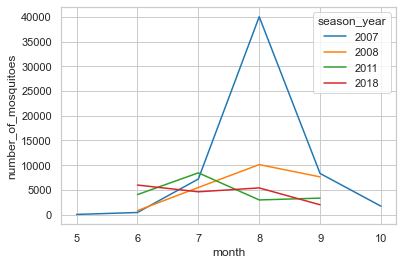

In [16]:
# These abnormal year shows abnormal in the heatmap below, but seems nothing exciting in lineplot
sns.lineplot(data=p2[(p2['season_year'] == 2007 ) | (p2['season_year'] ==  2008) | (p2['season_year'] ==  2011) | (p2['season_year'] ==  2018)], 
             x= 'month', y ='number_of_mosquitoes',hue='season_year', palette='tab10')



<AxesSubplot:xlabel='month', ylabel='result_b'>

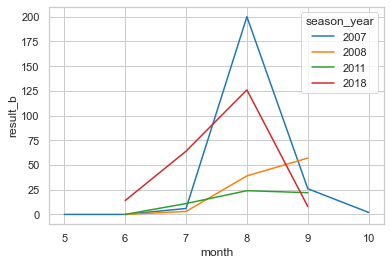

In [17]:

sns.lineplot(data=p2[(p2['season_year'] == 2007 ) | (p2['season_year'] ==  2008) | (p2['season_year'] ==  2011) | (p2['season_year'] ==  2018)], 
             x= 'month', y ='result_b',hue='season_year', palette='tab10')



In [18]:
# mapbox api
px.set_mapbox_access_token('pk.eyJ1IjoiZHJlYW0zciIsImEiOiJja3p0ZnZwem4xbjExMnZuYTNyNm05NXFkIn0.Mn-2ZucLu2QP-9nS1UZbKA')


In [22]:
boundary = gpd.read_file("https://data.cityofchicago.org/resource/y6yq-dbs2.geojson")

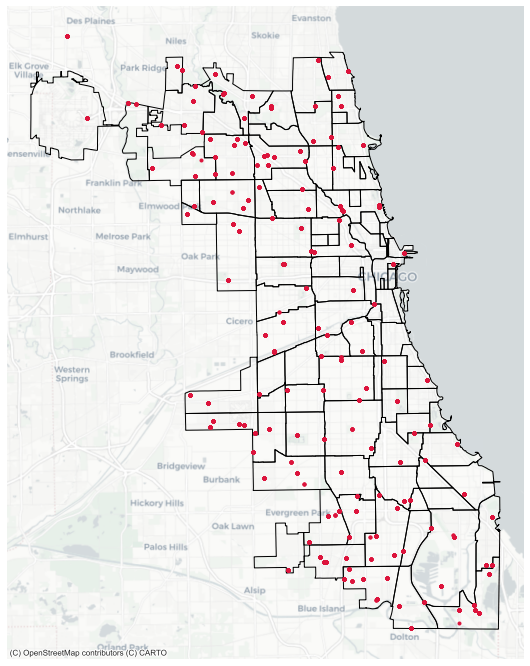

In [78]:
# create the axes
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the unique traps as points
points = gpd.GeoDataFrame(
    df_trap_raw, geometry=gpd.points_from_xy(df_trap_raw.longitude, df_trap_raw.latitude),
    crs="EPSG:4326").to_crs('EPSG:26916')


# Add the city limits
boundary.to_crs(points.crs).plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')

# Plot
points.plot(ax=ax, marker='.', color='crimson')

# NEW: plot the basemap underneath
ctx.add_basemap(ax=ax, crs=points.crs, source=ctx.providers.CartoDB.Positron)

# remove axis lines
ax.set_axis_off()


In [95]:
mosquitoN_and_result = pd.concat([
  df_trap.groupby(['trap','latitude','longitude'])['number_of_mosquitoes'].sum(),
  df_trap.groupby(['trap','latitude','longitude'])['result_b'].sum()],
  axis = 1
).reset_index()

In [96]:
mosquitoN_and_result.head()

,trap,latitude,longitude,number_of_mosquitoes,result_b
0,220A,41.987054,-87.728398,116,2
1,T001,41.954282,-87.733843,25,0
2,T002,41.956299,-87.797517,16271,88
3,T002A,41.965414,-87.782119,178,0
4,T002B,41.951535,-87.789835,9,0


Size is total number of mosquitoes in each trap, color is total positive times in each trap

In [97]:

plt.figure(figsize=(8, 6), dpi=80)
fig = px.scatter_mapbox(mosquitoN_and_result, lat = 'latitude', lon  = 'longitude', color = 'result_b',
                        size = 'number_of_mosquitoes', color_continuous_scale = px.colors.sequential.Viridis,
                        hover_data = ['number_of_mosquitoes', 'result_b'],
                       zoom = 9)
fig.update_layout(
    title="Total number of mosquitoes and positive times",
    width=500,
    height=700,
)

fig.show()

<Figure size 640x480 with 0 Axes>

spray data

In [11]:
spray = pd.read_csv('../data/data from kaggle/spray.csv')

In [12]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [21]:
fig = px.scatter_mapbox(spray, lat = 'Latitude', lon  = 'Longitude',
                     zoom = 8)

fig.update_layout(
    title="Spray day-wise",
    width=500,
    height=700,
)

fig.show()

In [7]:
forestry = gpd.read_file("../data/Forestry/Forestry.shp")
park = gpd.read_file("../data/Parks - Chicago Park District Park Boundaries (current).geojson")

NameError: name 'gpd' is not defined

In [108]:
forestry.geometry.crs

<Derived Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Illinois - counties of Boone; Champaign; Clark; Clay; Coles; Cook; Crawford; Cumberland; De Kalb; De Witt; Douglas; Du Page; Edgar; Edwards; Effingham; Fayette; Ford; Franklin; Gallatin; Grundy; Hamilton; Hardin; Iroquois; Jasper; Jefferson; Johnson; Kane; Kankakee; Kendall; La Salle; Lake; Lawrence; Livingston; Macon; Marion; Massac; McHenry; McLean; Moultrie; Piatt; Pope; Richland; Saline; Shelby; Vermilion; Wabash; Wayne; White; Will; Williamson.
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [109]:
forestry.head()

,AREA,PERIMETER,FOREST_,FOREST_ID,NAME,EDIT_DATE1,FID_,SHAPE_AREA,SHAPE_LEN,geometry
0,2.144996e+07,37340.04869,1,2,CATHRINE CHEVALIER WOODS,03-21-01,None,2.144996e+07,37340.064884,"MULTIPOLYGON (((1116598.400 1932500.000, 11165..."
1,1.878679e+07,48679.85682,2,8,SHILLER WOODS NORTH,03-21-01,None,1.878679e+07,48679.859013,"MULTIPOLYGON (((1115000.000 1927103.090, 11149..."
2,1.507464e+06,4878.06941,3,9,SHILLER PLAYFIELD,03-21-01,None,1.507464e+06,4878.068560,"POLYGON ((1120638.930 1926922.840, 1120632.440..."
3,2.405552e+07,27200.18266,4,3,SHILLER WOODS SOUTH,03-21-01,None,2.405551e+07,27200.178457,"MULTIPOLYGON (((1115000.000 1922223.430, 11150..."
4,5.991599e+06,16391.37539,5,10,SIDNEY YATES FLATWOODS,03-21-01,None,5.991605e+06,16391.364149,"POLYGON ((1135000.000 1942163.200, 1134922.100..."


In [110]:

forestry = forestry.to_crs(park.crs)

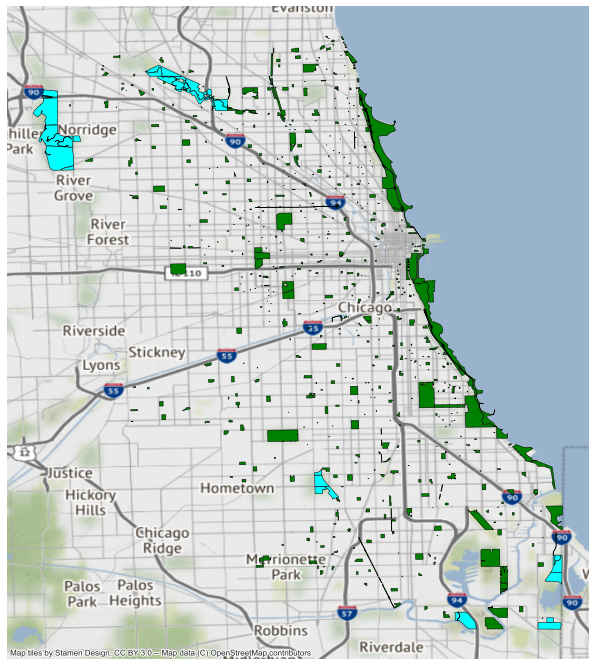

In [115]:
# create the axes
fig, ax = plt.subplots(figsize=(12, 12))

# Add the forestry and park
forestry.plot(ax=ax, edgecolor='black', linewidth=0.5, facecolor='cyan')
park.plot(ax=ax, edgecolor='black', linewidth=0.5, facecolor='green')

# NEW: plot the basemap underneath
ctx.add_basemap(ax=ax, crs=forestry.crs, source=ctx.providers.Stamen.Terrain)

# remove axis lines
ax.set_axis_off()

fig.show()

Weather

In [119]:
weather = pd.read_csv('../data/data from kaggle/weather.csv')

In [120]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [127]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9



Trash 

street cleaning

flooding


In [121]:
# make a kernal density map of both number of mosquitoes and wnv posivity

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("../data/data from kaggle/mapdata_copyright_openstreetmap_contributors.txt")

def drawKDE(year, factor, subplot): 
  # factor = 'result_b' or factor = 'number_of_mosquitoes'
  # color is color of heatmap, blue or red
  if factor == 'result_b':
      alpha_cm = plt.cm.Blues;
  elif factor == 'number_of_mosquitoes':
      alpha_cm = plt.cm.Reds;

  alpha_cm._init()
  alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
  aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
  lon_lat_box = (-88, -87.5, 41.6, 42.1)

  if factor == 'result_b':
    sigthings = df_trap[(df_trap['result_b'] > 0) & (df_trap['season_year'] == year)]
    sigthings = sigthings.groupby(['week', 'trap','longitude', 'latitude']).max()[factor].reset_index()
    X = sigthings[['longitude', 'latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X);
    
  elif factor == 'number_of_mosquitoes':
    sigthings = df_trap[df_trap['season_year'] == year]
    sigthings = sigthings.groupby(['week', 'trap','longitude', 'latitude']).sum()[factor].reset_index()
    X = sigthings[['longitude', 'latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X,sample_weight = sigthings[factor]) # if not this line, kernal density only count frequency

  # kernal density diagram here
  xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
  gridpoints = np.array([xv.ravel(),yv.ravel()]).T
  zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
  plt.subplot(subplot)
  plt.gca().set_title(year)
  plt.imshow(mapdata, 
            cmap=plt.get_cmap('gray'), 
            extent=lon_lat_box, 
            aspect=aspect)
  plt.imshow(zv, 
            origin='lower', 
            cmap=alpha_cm, 
            extent=lon_lat_box, 
            aspect=aspect)

# trap points
  locations = df_trap[['longitude', 'latitude']].drop_duplicates().values
  plt.scatter(locations[:,0], locations[:,1],s=1, marker='x',c="black")

  plt.savefig('heatmap.png')

In [122]:
def ImgSet(a, b, factor):
  # a and b are the start and end year of data. Must be 7 years.
  # factor = 'result_b' or factor = 'number_of_mosquitoes'
  plt.figure(figsize=(18,6))

  for year,subplot in zip(np.arange(a,b,1), [181, 182, 183, 184,185,186,187,188]):
    drawKDE(year,factor, subplot)

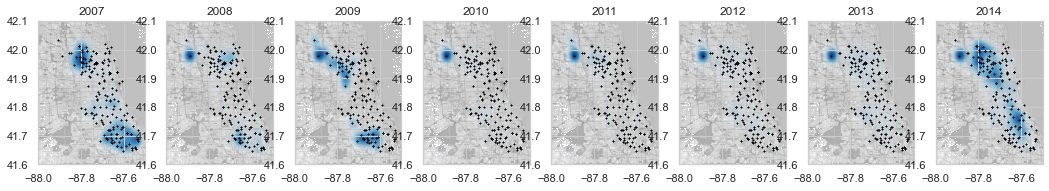

In [123]:
ImgSet(2007,2015,'result_b')

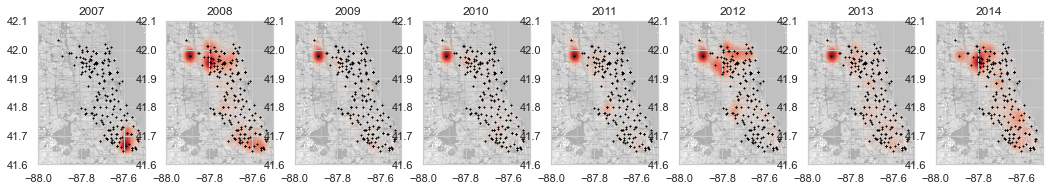

In [124]:
ImgSet(2007,2015,'number_of_mosquitoes')

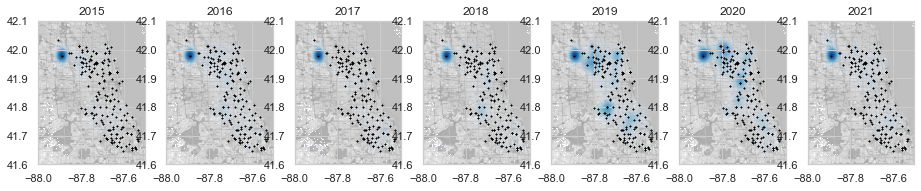

In [125]:
ImgSet(2015,2022,'result_b')

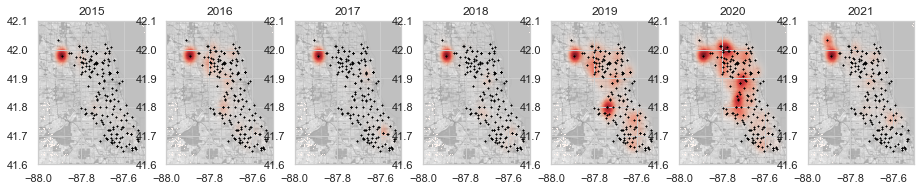

In [126]:
ImgSet(2015,2022,'number_of_mosquitoes')

Notes Mar 4:

Get down to one year data that spray has

Different before & after spray

Spatial relationship to parks and waters

In [ ]:
df_trap.test_date.drop_duplicates()

In [ ]:
Classnote 
git rid of spatial auto correlation
simultaneous auto regression SAR and 

In [7]:
df_trap_new = gpd.read_file('../data/Processed data/trap.geojson')

In [101]:
df_trap_new

,season_year,week,test_id,block,trap,trap_type,test_date,number_of_mosquitoes,result,species,latitude,longitude,location,month,result_b,year_week,geometry
0,2021,39,53373,12XX W GREENLEAF AVE,T018,GRAVID,2021-09-30T00:09:00,2,negative,CULEX PIPIENS/RESTUANS,42.010529,-87.660845,"{'latitude': '42.01052928915475', 'longitude':...",9,0,2021/W39,POINT (-87.66085 42.01053)
1,2021,39,53381,61XX W FULLERTON AVE,T013,GRAVID,2021-09-30T00:09:00,13,negative,CULEX PIPIENS/RESTUANS,41.923887,-87.778910,"{'latitude': '41.92388736426867', 'longitude':...",9,0,2021/W39,POINT (-87.77891 41.92389)
2,2021,39,53406,10XX E 67TH ST,T073,GRAVID,2021-09-30T00:09:00,7,negative,CULEX PIPIENS/RESTUANS,41.773085,-87.600168,"{'latitude': '41.773085401492715', 'longitude'...",9,0,2021/W39,POINT (-87.60017 41.77309)
3,2021,39,53401,52XX W 63RD ST,T065,GRAVID,2021-09-30T00:09:00,8,negative,CULEX PIPIENS/RESTUANS,41.778305,-87.754366,"{'latitude': '41.77830515554422', 'longitude':...",9,0,2021/W39,POINT (-87.75437 41.77831)
4,2021,39,53383,5XX S CENTRAL AVE,T031,GRAVID,2021-09-30T00:09:00,5,positive,CULEX PIPIENS/RESTUANS,41.872873,-87.764737,"{'latitude': '41.87287286249572', 'longitude':...",9,1,2021/W39,POINT (-87.76474 41.87287)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32873,2007,21,20012,75XX N OAKLEY AVE,T148,GRAVID,2007-05-29T00:05:00,1,negative,CULEX PIPIENS/RESTUANS,42.017801,-87.687601,"{'latitude': '42.0178008501155', 'longitude': ...",5,0,2007/W21,POINT (-87.68760 42.01780)
32874,2007,21,20038,22XX W 113TH ST,T086,GRAVID,2007-05-29T00:05:00,1,negative,CULEX PIPIENS/RESTUANS,41.688171,-87.678252,"{'latitude': '41.688170589570205', 'longitude'...",5,0,2007/W21,POINT (-87.67825 41.68817)
32875,2007,21,20051,2XX W 89TH ST,T096,CDC,2007-05-29T00:05:00,5,negative,CULEX RESTUANS,41.732428,-87.631056,"{'latitude': '41.73242806400838', 'longitude':...",5,0,2007/W21,POINT (-87.63106 41.73243)
32876,2007,21,20031,22XX N CANNON DR,T054,GRAVID,2007-05-29T00:05:00,2,negative,CULEX PIPIENS/RESTUANS,41.922512,-87.632378,"{'latitude': '41.922512376871495', 'longitude'...",5,0,2007/W21,POINT (-87.63238 41.92251)


In [197]:
pos_by_week = df_trap_new.groupby('year_week')[['result_b','number_of_mosquitoes']].sum().reset_index()
pos_by_week['Pos_MA7'] = pos_by_week['result_b'].rolling(7).mean()
pos_by_week.tail(30)

,year_week,result_b,number_of_mosquitoes,Pos_MA7
237,2020/W29,2,1781,1.142857
238,2020/W30,2,1276,0.714286
239,2020/W31,13,2476,2.571429
240,2020/W32,6,1096,3.428571
241,2020/W33,18,2270,6.000000
242,2020/W34,21,2007,9.000000
243,2020/W35,21,2571,11.857143
244,2020/W36,13,1366,13.428571
245,2020/W37,0,202,13.142857
246,2020/W38,5,476,12.000000


In [51]:
sns.color_palette("tab10")[0]


(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

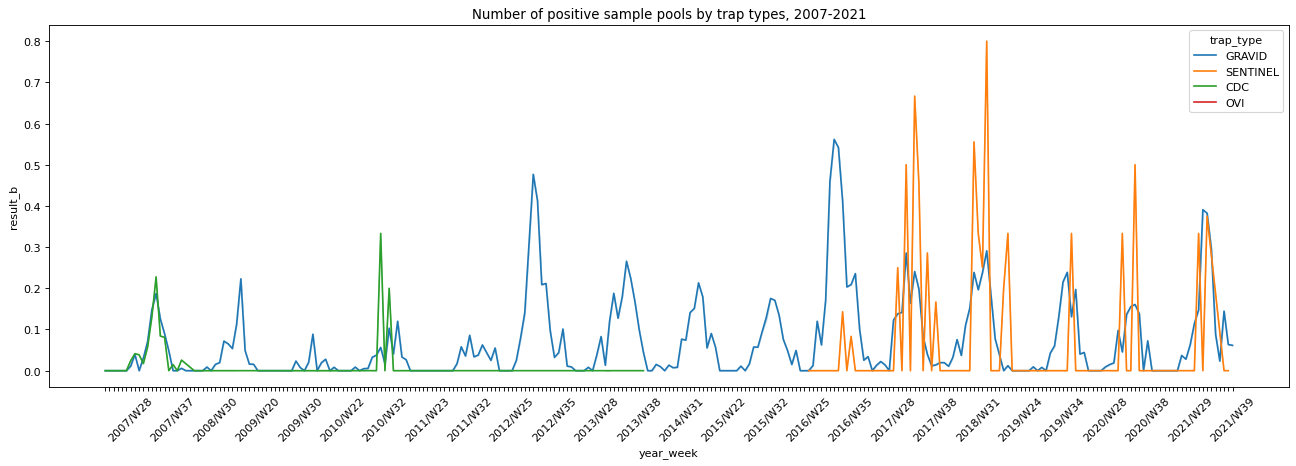

In [49]:
# trends in general

plt.figure(figsize=(20, 6), dpi=80)

plot_ = sns.lineplot(data=df_trap_new, x= 'year_week', y ='result_b', hue='trap_type', palette='tab10',ci=1)

plt.title('Number of positive sample pools by trap types, 2007-2021')
plt.xticks(rotation=45)

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plot_.invert_xaxis()



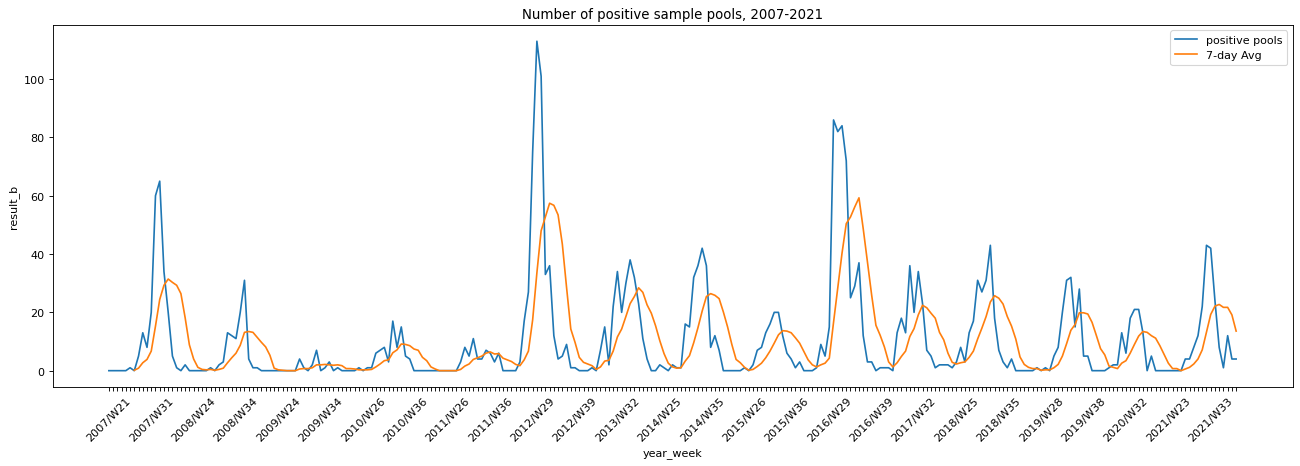

In [169]:
# trends in general

plt.figure(figsize=(20, 6), dpi=80)

plot_ = sns.lineplot(data=pos_by_week, x='year_week', y='result_b', palette='tab10',label="positive pools")
plot_ = sns.lineplot(data=pos_by_week, x='year_week', y='Pos_MA7', palette='tab10',label="7-day Avg")

plt.title('Number of positive sample pools, 2007-2021')
plt.xticks(rotation=45)

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        


In [39]:
p_

pandas.core.series.Series

Text(0.5, 1.0, 'Number of total traps, 2007-2021')

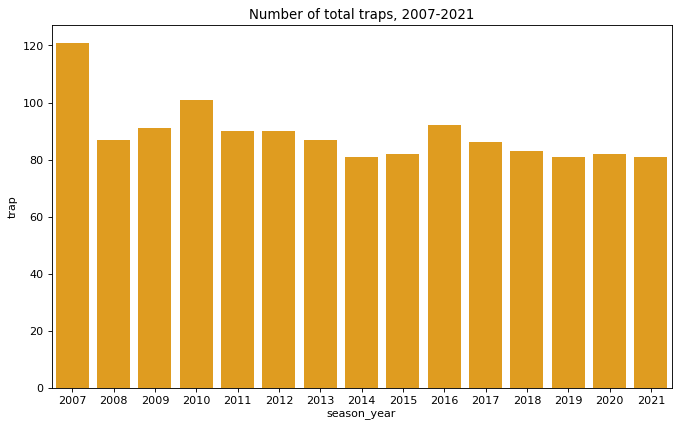

In [45]:
# the trend in ascending, would it be possible that there are more traps in the city?
# number of traps
plt.figure(figsize=(10, 6), dpi=80)

p_= df_trap_new.groupby('season_year')['trap'].nunique().reset_index()
sns.barplot(data=p_, x=p_['season_year'],y=p_['trap'], color='orange')
plt.title('Number of total traps, 2007-2021')


Text(0.5, 1.0, 'Number of traps of different types, 2007-2021')

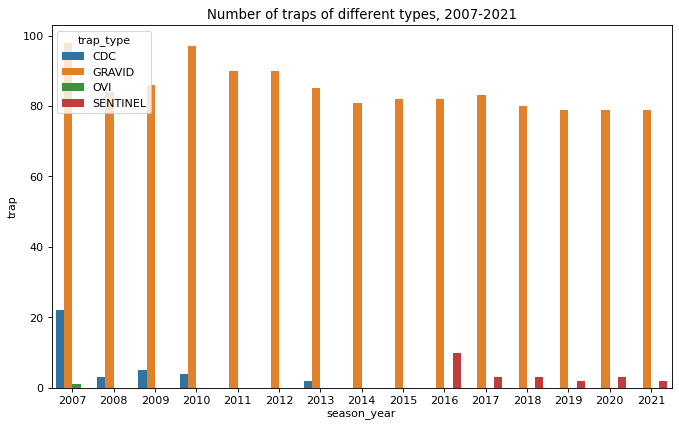

In [47]:
# the trend in ascending, would it be possible that there are more traps in the city?
# number of traps

plt.figure(figsize=(10, 6), dpi=80)

traps_overyears = df_trap_new.groupby(['season_year','trap_type'])['trap'].nunique().reset_index()
sns.barplot(data=traps_overyears,x='season_year',y='trap', hue='trap_type', palette='tab10')
plt.title('Number of traps of different types, 2007-2021')


In [69]:
# positivity in different traps
a = df_trap_new.groupby('trap_type')['result_b'].sum()

In [70]:
# number of noquitoes in different traps
b = df_trap_new.groupby('trap_type')['number_of_mosquitoes'].sum()

In [71]:
# total number of different traps, so there are most collection from gravid trap
c = df_trap_new.groupby('trap_type')['result'].count()

In [95]:
trap_type = pd.DataFrame([a,b,c]).T.reset_index()
trap_type.columns=['trap_type','total_positivity','total_number_of_mosquitoes','total_obserations']

In [97]:
trap_type['positivity_rate'] = trap_type['total_positivity'] / trap_type['total_obserations']
trap_type['mosquitoes_rate'] = trap_type['total_number_of_mosquitoes'] / trap_type['total_obserations']


In [98]:
trap_type

,trap_type,total_positivity,total_number_of_mosquitoes,total_obserations,positivity_rate,mosquitoes_rate
0,CDC,79,35334,1256,0.062898,28.132166
1,GRAVID,2651,372014,31278,0.084756,11.893791
2,OVI,0,1,1,0.000000,1.000000
3,SENTINEL,48,6805,343,0.139942,19.839650


In [ ]:
         Logit Regression Results                           
==============================================================================
Dep. Variable:               result_b   No. Observations:                15868
Model:                          Logit   Df Residuals:                    15840
Method:                           MLE   Df Model:                           27
Date:                Thu, 28 Apr 2022   Pseudo R-squ.:                  0.2664
Time:                        20:15:34   Log-Likelihood:                -2595.1
converged:                      False   LL-Null:                       -3537.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                                     coef  std err        z    P>|z|    [0.025    0.975]
---------------------------------------------------------------------------------------
season_year                       0.0308    0.012    2.522    0.012     0.007     0.055
week                              0.0522    0.016    3.298    0.001     0.021     0.083
number_of_mosquitoes              0.0576    0.002   23.828    0.000     0.053     0.062
distance_to_water                -3.1483    3.592   -0.876    0.381   -10.189     3.893
distance_to_michLake              6.2772    0.888    7.070    0.000     4.537     8.017
distance_to_parks                -1.6588    3.049   -0.544    0.586    -7.634     4.317
distance_to_bad_santination   -5.705e-05    0.005   -0.011    0.991    -0.010     0.010
AWND                             -0.1377    0.035   -3.954    0.000    -0.206    -0.069
PRCP                              0.1959    0.254    0.770    0.441    -0.303     0.694
tavg                              0.0375    0.011    3.515    0.000     0.017     0.058
WDF2                              0.0013    0.001    1.299    0.194    -0.001     0.003
WT01                             -0.0701    0.042   -1.661    0.097    -0.153     0.013
WT02                             -0.1393    0.191   -0.730    0.465    -0.513     0.235
WT03                              0.0191    0.047    0.406    0.685    -0.073     0.111
WT05                              0.3768    0.285    1.321    0.187    -0.182     0.936
WT08                             -0.0247    0.045   -0.552    0.581    -0.112     0.063
WT10                             -8.7232  183.961   -0.047    0.962  -369.279   351.833
result_lag_1                      0.4503    0.109    4.146    0.000     0.237     0.663
result_lag_2                      0.2297    0.120    1.917    0.055    -0.005     0.465
species_CULEX ERRATICUS         -85.8398 9861.920   -0.009    0.993 -1.94e+04  1.92e+04
species_CULEX PIPIENS           -71.8010   24.489   -2.932    0.003  -119.799   -23.803
species_CULEX PIPIENS/RESTUANS  -71.8812   24.513   -2.932    0.003  -119.925   -23.837
species_CULEX RESTUANS          -71.8389   24.512   -2.931    0.003  -119.881   -23.797
species_CULEX SALINARIUS       -154.0229 4.53e+17 -3.4e-16    1.000 -8.87e+17  8.87e+17
species_CULEX TARSALIS          -87.9549 3210.119   -0.027    0.978 -6379.673  6203.764
species_CULEX TERRITANS         -73.7517   24.517   -3.008    0.003  -121.804   -25.700
species_UNSPECIFIED CULEX       -96.7378  3.2e+05   -0.000    1.000 -6.26e+05  6.26e+05
wind_lag_log                      0.8170    0.054   15.206    0.000     0.712     0.922
=======================================================================================